# Machine Learning Project

## Bank Marketing Data Set

#### DATASET: https://archive.ics.uci.edu/ml/datasets/bank+marketing 

> Data: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed


In [95]:
%matplotlib inline

import os
import numpy as np # importing numpy array
import pandas as pd # importing panda library
import seaborn as sns # importing seaborn, advanced of matplot
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats.stats import pearsonr

pd.options.display.max_rows = 30
sns.set(style='ticks', context='talk')

In [17]:
#read_csv is a function in pandas used to read data from an csv file into a list of DataFrames
tables = pd.read_csv("E:/ML_HW/bank-full.csv",engine="python",index_col=False,sep=';\s*')
tables.head()


,"""age""","""job""","""marital""","""education""","""default""","""balance""","""housing""","""loan""","""contact""","""day""","""month""","""duration""","""campaign""","""pdays""","""previous""","""poutcome""","""y"""
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""


# Information about our data

Input variables:
    bank client data:
1. - age (numeric)
2. - job : type of job 
3. - marital : marital status 
4. - education 
5. - default: has credit in default? 
6. - housing: has housing loan? 
7. - loan: has personal loan? 
8. - contact: contact communication type  
9. - month: last contact month of year 
10. - day_of_week: last contact day of the week
11. - duration: last contact duration, in seconds (numeric). 
12. - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. - pdays: number of days that passed by after the client was last contacted from a previous campaign 
14. - previous: number of contacts performed before this campaign and for this client (numeric)
15. - poutcome: outcome of the previous marketing campaign 
16. - balance- balance of the customers
17. - deals, whether the calls/marketing resulted in getting a deal for the bank

# Data Cleaning

 1. remove all the " from columns

In [18]:
tables.columns=['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome','deals']
tables.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deals
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""


In [19]:
##tables['age']=tables.age.str.strip('"')
tables['job']=tables.job.str.strip('""')
tables['marital']=tables.marital.str.strip('""')
tables['education']=tables.education.str.strip('""')
tables['default']=tables.default.str.strip('""')
tables['housing']=tables.housing.str.strip('""')
tables['loan']=tables.loan.str.strip('""')
tables['contact']=tables.contact.str.strip('""')
tables['month']=tables.month.str.strip('""')
tables['poutcome']=tables.poutcome.str.strip('""')
tables['deals']=tables.deals.str.strip('""')
tables.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deals
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [20]:
tables.shape

(45211, 17)

##### Total rows: 45211
##### Total Columns: 17

##### Checking Data types for all variables:

In [21]:
tables.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deals        object
dtype: object

##### Checking for null values, we see that we do not have any null values in the data

In [22]:
tables.isnull().values.any()

False

##### We have to convert datatype of age from object to numeric

In [23]:
tables['age']=pd.to_numeric(tables['age'])
tables['age'].dtype

dtype('int64')

##### We have no junk values in deals and education column

In [24]:
tables.deals.unique()

array(['no', 'yes'], dtype=object)

In [25]:
tables.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

<b> How many deals were successful? </b>

In [26]:
tables[tables.deals=='yes'].count()[1]

5289

##### Out of 45211 calls made, 5289 deposits were booked. 

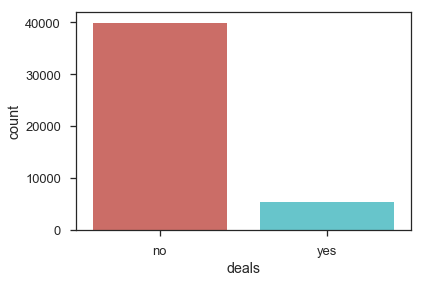

In [27]:
sns.countplot(x='deals',data=tables,palette='hls')

<b> Success rate of the bank marketing? </b>

In [28]:
(5289/45211)*100

11.698480458295547

In [29]:
tables.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


As seen from the data, the minimum age is <b>18</b> and the maximum age is <b>95</b>, with mean age being <b>41</b> 
and the balance range is also diverse with person being in debt and earning 100 grands 
</b>

# Data Analysis and Data Distribution

In [30]:
tables.groupby('deals').mean()

,age,balance,day,duration,campaign,pdays,previous
deals,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


## Observations:

>The average age of customers who bought the term deposit is higher than that of the customers who didn’t.

>The pdays (days since the customer was last contacted) is understandably higher for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.

>Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

##### Distribution of balance variable

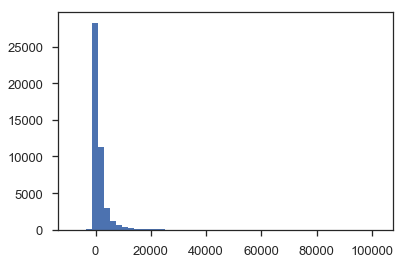

In [31]:
plt.hist(tables.balance,bins=50)
plt.show()

We can see that the data is right skewed.

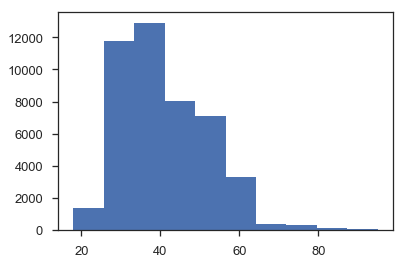

In [32]:
# Distribution of Age variable
plt.hist(tables.age,bins=10)
plt.show()

We see that maximum population is in the age group of 30-60 years 

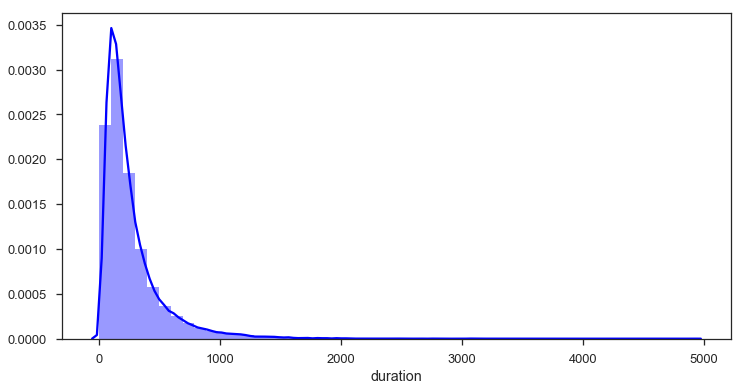

In [33]:
# Distribution of Duration variable
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(tables.duration,color='blue');

Above data tells us that the data is highly skewed to the right

# Outlier Analysis of our predictor variable

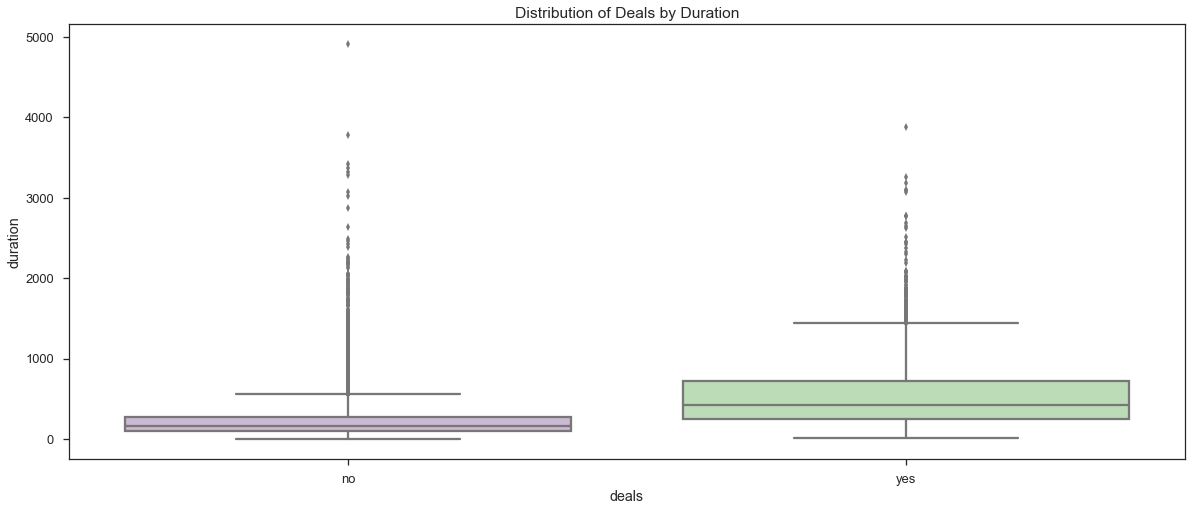

In [34]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(x="deals", y="duration", data=tables, palette="PRGn")
ax.set_title('Distribution of Deals by Duration')

From the above graph,it can be observed that the distribution of deals with respect to age doesn't vary much. The duration is high when deals are made and vice versa. There are a few outliers too

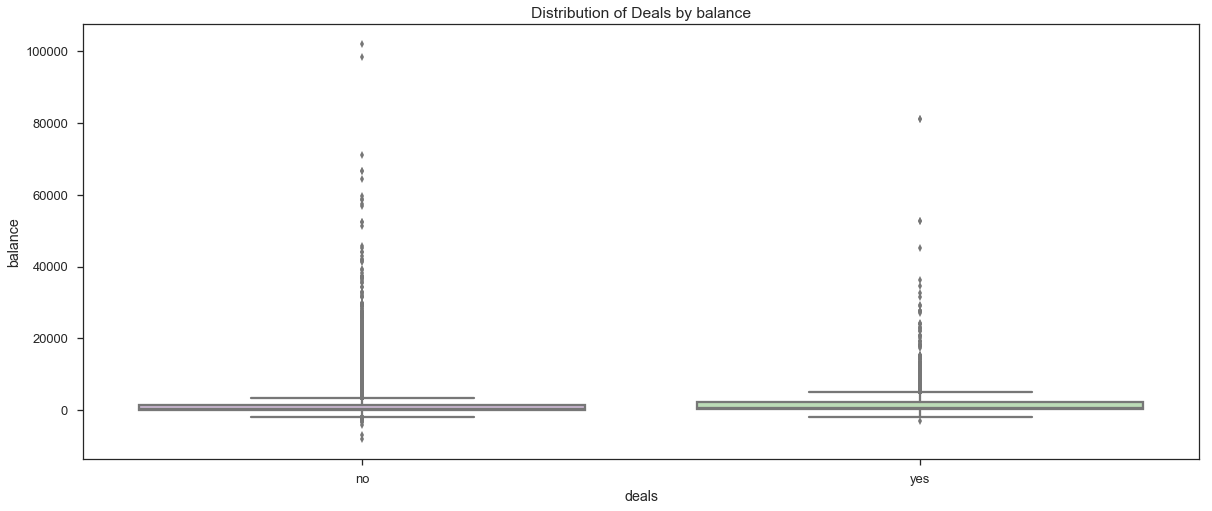

In [35]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(x="deals", y="balance", data=tables, palette="PRGn")
ax.set_title('Distribution of Deals by balance')

Since our balance variable is highly skewed, above graph doesn't convey any relevant information.

General inference from this graph is, if the duration is high, then the deals were positive else negative

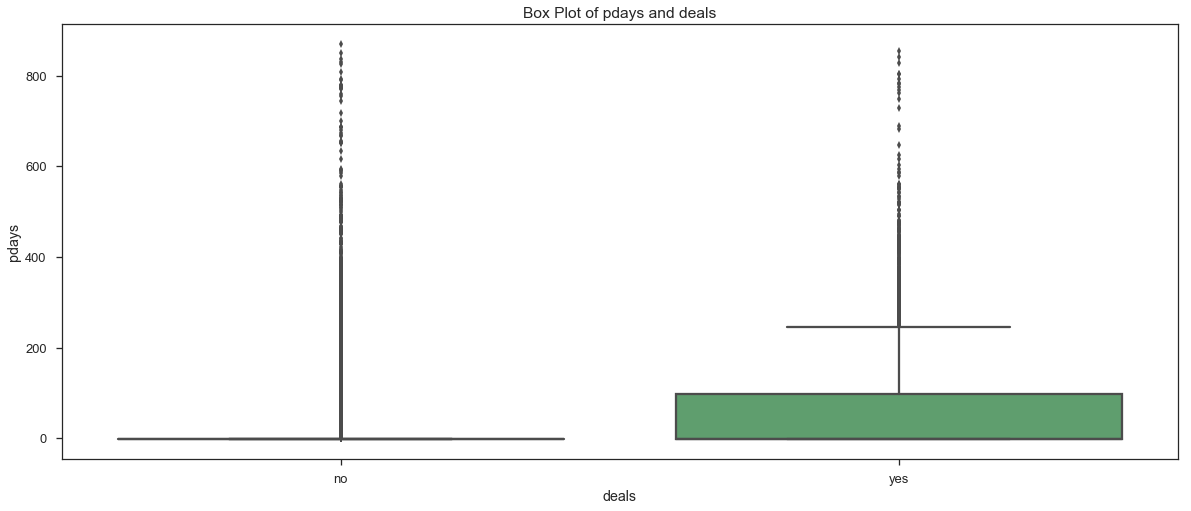

In [36]:
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.boxplot(x="deals", y="pdays", data=tables)
ax.set_title('Box Plot of pdays and deals')

From the above graph it can be inferred that the pdays is high for successful deals

<b>Understanding the relations between the variables</b>

C:\Users\parth\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


the corelation between these two variables are:  0.0215603804947


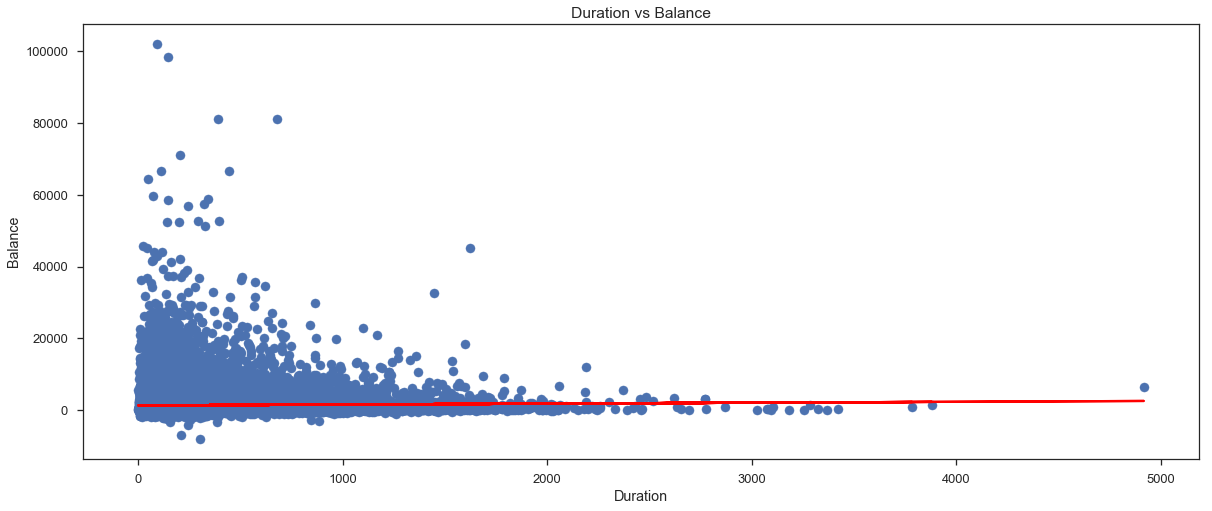

In [37]:
fig, ax = plt.subplots(figsize=(20,8))
fit = np.polyfit(tables.duration,tables.balance, deg=1)
ax.plot(tables.duration, fit[0] * tables.duration + fit[1], color='red')
plt.scatter(tables.duration,tables.balance)
plt.title('Duration vs Balance')
plt.xlabel('Duration')
plt.ylabel('Balance')
fig.show()
print('the corelation between these two variables are: ',pearsonr(tables.duration,tables.balance)[0])

C:\Users\parth\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


the corelation between these two variables are:  0.0215603804947


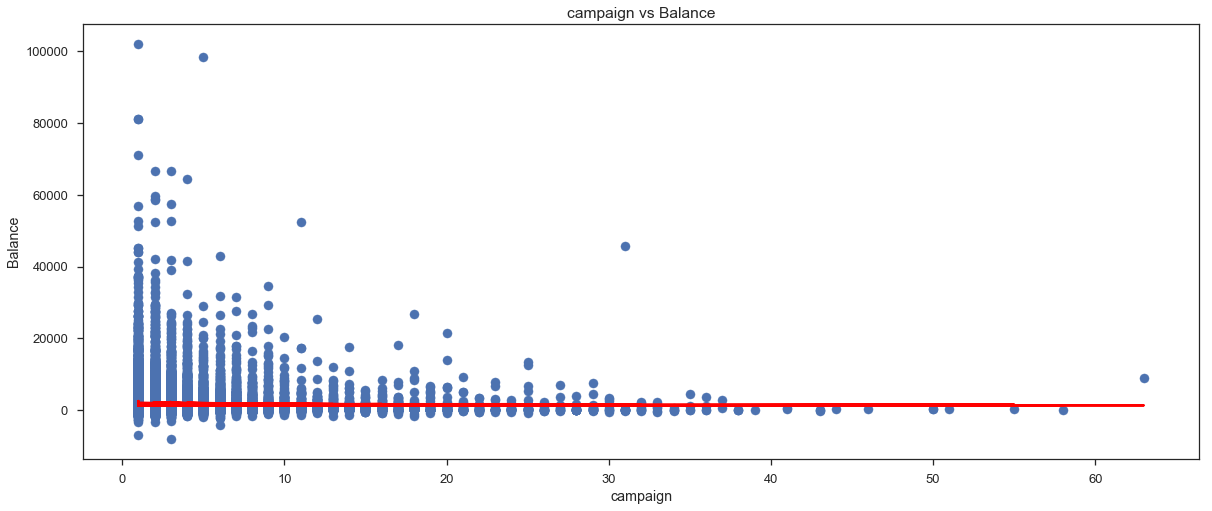

In [38]:
fig, ax = plt.subplots(figsize=(20,8))
fit = np.polyfit(tables.duration,tables.balance, deg=1)
ax.plot(tables.campaign, fit[0] * tables.duration + fit[1], color='red')
plt.scatter(tables.campaign,tables.balance)
plt.title('campaign vs Balance')
plt.xlabel('campaign')
plt.ylabel('Balance')
fig.show()
print('the corelation between these two variables are: ',pearsonr(tables.duration,tables.balance)[0])

 Is job title affecting deals? : Yes! Hence, it can be said that it is a useful predictor

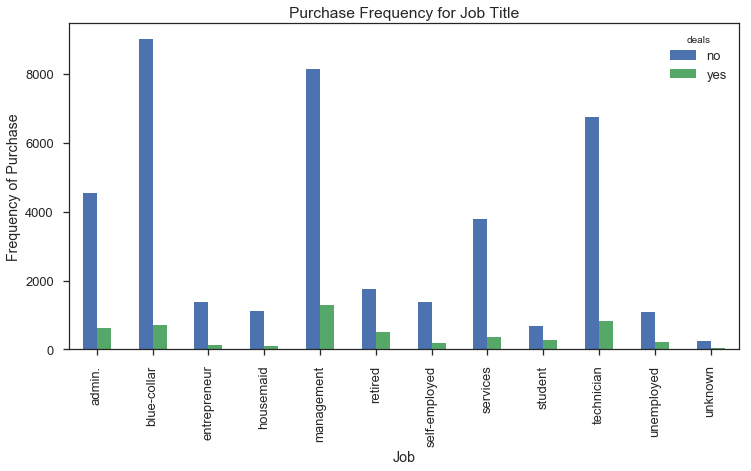

In [39]:
%matplotlib inline
pd.crosstab(tables.job,tables.deals).plot(kind='bar',figsize=(12,6))
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.show()

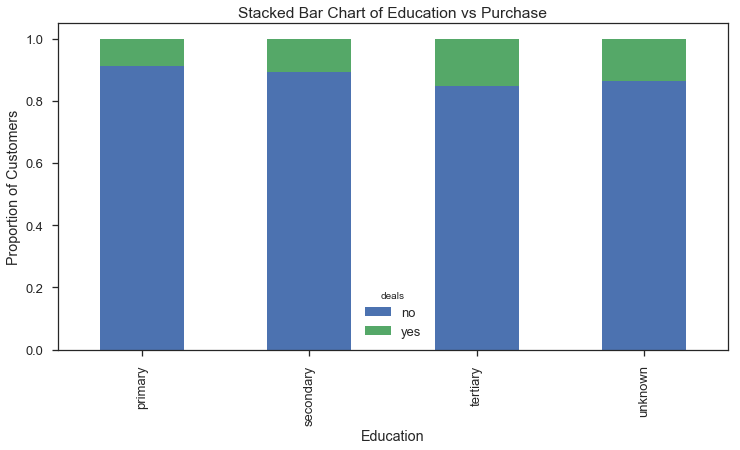

In [40]:
# education affecting

table=pd.crosstab(tables.education,tables.deals)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',figsize=(12,6), stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
#plt.savefig('edu_vs_pur_stack')

 Is Education affecting deals? : Yes! Hence we can say that it is a useful predictor

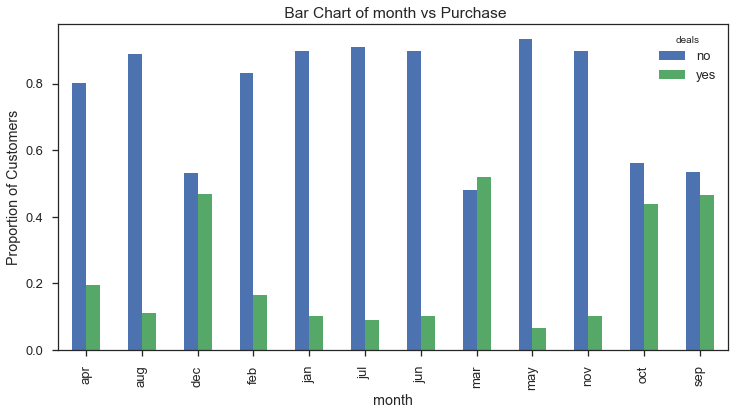

In [41]:
table=pd.crosstab(tables.month,tables.deals)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',figsize=(12,6))
plt.title(' Bar Chart of month vs Purchase')
plt.xlabel('month')
plt.ylabel('Proportion of Customers')
#plt.savefig('edu_vs_pur_stack')

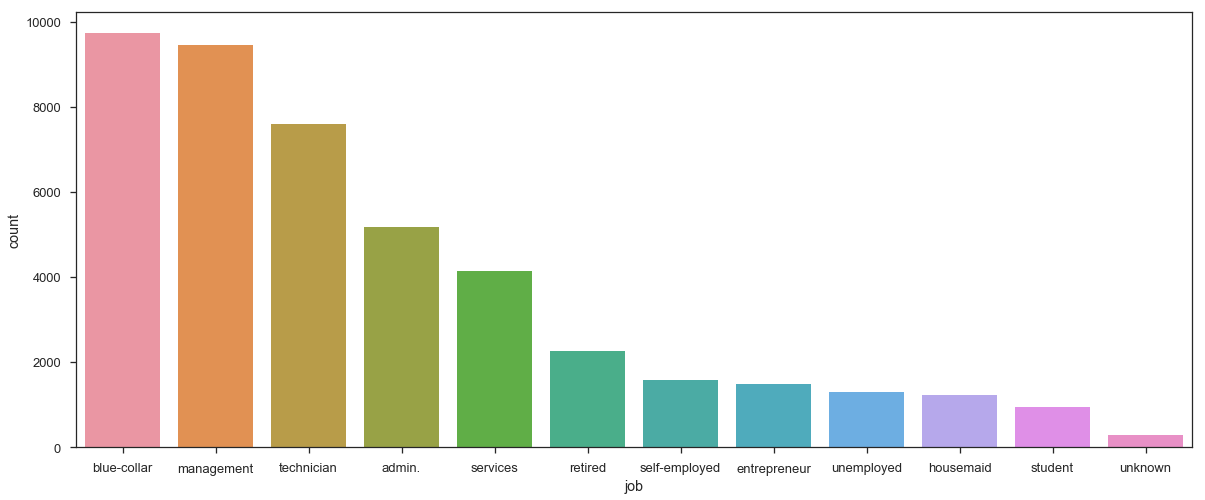

In [42]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.countplot('job',data=tables,order = tables['job'].value_counts().index)

### Data preparation for analysis of model

#### Converting objects to numeric for our model

In [43]:
tables.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deals
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [44]:
tables['deals'] = np.where(tables['deals']=='yes', 1, 0)
#tables['default'] = np.where(tables['default']=='yes', 1, 0)
#tables['loan'] = np.where(tables['loan']=='yes', 1, 0)
#tables['housing'] = np.where(tables['housing']=='yes', 1, 0)

In [45]:
new_data=pd.get_dummies(tables)
new_data.head(2)

,age,balance,day,duration,campaign,pdays,previous,deals,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### Using Recursive Feature Elimination (RFE) to identify useful predictors

In [46]:
data_column=new_data[new_data.columns.difference(['deals'])]
data_output=new_data['deals']

In [47]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(data_column, data_output)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False  True False False False False False False
 False False False  True False False False False False False False False
  True False False False False  True False False False False  True  True
  True  True  True False  True  True  True  True  True False  True  True
  True  True False]
[32 34 16  3 13  1 29 12  8 31  5  9 23 10 20  1 26 19 11  6 25  2 22 21  1
 24  7 14 30  1 17  4 27 18  1  1  1  1  1 15  1  1  1  1  1 33  1  1  1  1
 28]


In [48]:
b=data_column.columns
a=rfe.support_
c=pd.DataFrame(a,index=b)
c=c[c[0]==True]

### Final columns to be used in our model are:


In [49]:
c.index

Index(['contact_unknown', 'housing_yes', 'job_student', 'loan_yes',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

# Questions to our data

<b>
1. What are the factors which are influencing the deals?
2. Is the marketing result fruitful? 
</b>

Machine learning models
1. Logistics Regression
2. Random Forest Classifier
3. K Nearest Neighbour

#### Based on RFE results, useful predictors are identified.

### Logistic regression with useful predictors

In [92]:
data2=data_column[['contact_unknown', 'housing_yes', 'job_student', 'loan_yes',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown']]

data2.head()

,contact_unknown,housing_yes,job_student,loan_yes,month_aug,month_dec,month_feb,month_jan,month_jul,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [93]:
data_column['job_student']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
        ..
45196    1
45197    0
45198    0
45199    0
45200    0
45201    0
45202    0
45203    1
45204    0
45205    0
45206    0
45207    0
45208    0
45209    0
45210    0
Name: job_student, Length: 45211, dtype: uint8

In [94]:
X = data2
y = data_output

In [53]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

C:\Users\parth\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [54]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
import statsmodels.api as sm
from statsmodels.api import add_constant #need to explicitly tell statsmodels to fit an intercept
X=add_constant(X)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.304282
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  deals   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45193
Method:                           MLE   Df Model:                           17
Date:                Wed, 09 May 2018   Pseudo R-squ.:                  0.1568
Time:                        20:21:46   Log-Likelihood:                -13757.
converged:                      False   LL-Null:                       -16315.
                                        LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3853        nan        nan        nan         nan         nan
contact_unknown     -1.3410      0.055    -24.2

C:\Users\parth\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\parth\Anaconda3\lib\site-packages\statsmodels\base\model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
C:\Users\parth\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\parth\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\parth\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [56]:
y_pred = LogReg.predict(X_test)

In [57]:
from sklearn import metrics
metrics.accuracy_score(y_pred,y_test)

0.89169861397817751

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[11815,   175],
       [ 1294,   280]], dtype=int64)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.99      0.94     11990
          1       0.62      0.18      0.28      1574

avg / total       0.87      0.89      0.86     13564



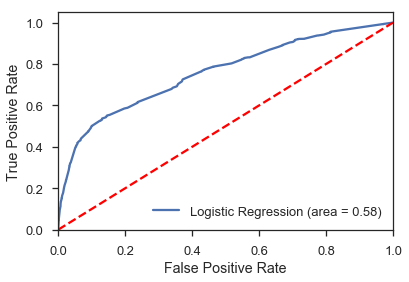

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LogReg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LogReg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

In [61]:
np.exp(result.params)

const               0.680281
contact_unknown     0.261573
housing_yes         0.546748
job_student         1.629094
loan_yes            0.649509
month_aug           0.358967
month_dec           1.752852
month_feb           0.626695
month_jan           0.334501
month_jul           0.414698
month_mar           2.970558
month_may           0.573670
month_nov           0.408804
month_oct           1.954124
month_sep           1.945126
poutcome_failure    0.475289
poutcome_other      0.612248
poutcome_success    4.752109
poutcome_unknown    0.491957
dtype: float64

In [62]:
coef = result.params
coef

const              -0.385250
contact_unknown    -1.341042
housing_yes        -0.603768
job_student         0.488024
loan_yes           -0.431538
month_aug          -1.024525
month_dec           0.561244
month_feb          -0.467296
month_jan          -1.095115
month_jul          -0.880204
month_mar           1.088750
month_may          -0.555700
month_nov          -0.894519
month_oct           0.669942
month_sep           0.665327
poutcome_failure   -0.743831
poutcome_other     -0.490618
poutcome_success    1.558588
poutcome_unknown   -0.709365
dtype: float64

In [63]:
def y (coef,job_student, month_dec ,month_mar,month_oct,month_sep,poutcome_success):
    return coef[0] + coef[3]* job_student + coef [6] * month_dec + coef [10] * month_mar + coef [13] * month_oct + coef [14] * month_sep + coef [17] * poutcome_success

In [64]:
y1 = y(coef,1,0,0,0,0,0)

In [65]:
print (y1)

0.10277409638


In [66]:
np.exp(1)

2.7182818284590451

In [67]:
p= np.exp(y1)/(1+np.exp(y1))

In [68]:
print ("The value of p is", p)

The value of p is 0.525670932271


In [69]:
y2 = y(coef,0,0,0,0,0,1)

In [70]:
p1= np.exp(y2)/(1+np.exp(y2))

In [71]:
p1

0.76374792481733766

#### Interpretation of Logistic regression model:

> With useful predictors, accuracy is 89.16%. All p values are zero

>  Logistic regression uses maximum likelihood, which is an iterative procedure.  The first iteration (called iteration 0) is the log likelihood of the "null" or "empty" model; that is, a model with no predictors.  At the next iteration, the predictor(s) are included in the model.  At each iteration, the log likelihood increases because the goal is to maximize the log likelihood. Here you can check that log likelihood when we perform with all the predictors with ierations=35 gives us the value -10781 and when iterations=7 then it increases to -13757

> While considering the coefficient of job_student, it is observed that the probability is 52.57%. This means that the deals are dependent on the job_student.

> While considering the coefficient of poutcome_success, it is observed that the probability is 76.37%. This means the marketing campaign was successful and it will be fruitful based on the outcome.

### Random Forest Classifier with useful predictors

In [74]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [75]:
#X = data_column
X = data2
y = data_output

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [76]:
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

In [77]:
from sklearn import metrics
metrics.accuracy_score(y_pred,y_test)

0.89162488941315243

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[11769,   221],
       [ 1249,   325]], dtype=int64)

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.98      0.94     11990
          1       0.60      0.21      0.31      1574

avg / total       0.87      0.89      0.87     13564



With useful predictors, accuracy is 89.16%.

# K Nearest Neighbour using cross validation on useful predictors

In [82]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [83]:
#X = data_column
X = data2
y = data_output

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [84]:
# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.886685343556


In [86]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=5, shuffle=False)

In [87]:
from sklearn.cross_validation import cross_val_score


# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print (scores)

[ 0.88301636  0.83524989  0.88343287  0.84273391  0.89847379  0.88409644
  0.70957753  0.37204158  0.48263658  0.65265487]


In [88]:
# use average accuracy as an estimate of out-of-sample accuracy
print (scores.mean())

0.744391382186


In [89]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print (k_scores)

[0.69320715931824206, 0.70619104714902448, 0.6859511338264721, 0.77892069769068106, 0.74439138218565337, 0.75122540500312918, 0.71594528646094757, 0.71747196236670097, 0.71512716238705842, 0.72147661714391575, 0.69320738976255081, 0.7032948772594434, 0.69542009722604958, 0.6961058351687478, 0.69610578133932244, 0.69696876000525321, 0.65814914632435784, 0.65845960998166597, 0.65837077185555648, 0.65726486588675392, 0.65578289287193425, 0.65414612600423916, 0.65246439199206785, 0.65365898927945632, 0.65120376557415183, 0.6501420633507029, 0.64981017068853442, 0.65040769199030601, 0.65140303231950725, 0.65290725156773521]


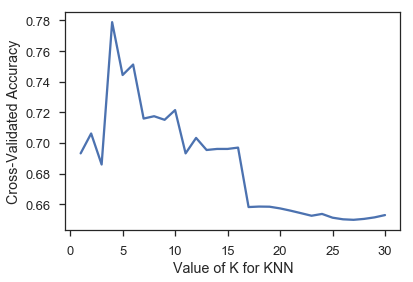

In [90]:
import matplotlib.pyplot as plt

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [91]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print (cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.657264865887


# Conclusion
Accuracy of the KNN model with useful predictors comes out to be 65.73%

# Final Conclusion

It can be observed that the marketing campaign will be fruitful based on the successful previous outcome. Also we can observe that the target variable over here "deals" are influenced by many dependent factors.

# Future Scope
With the help of classification algorithms such as SVM and Naive Bayes,we will perform our analysis and come with more accurate prediction

# References:

> DATASET: https://archive.ics.uci.edu/ml/datasets/bank+marketing

> Dr Patrick Shafto

> http://scikit-learn.org/stable/modules/neighbors.html

> http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

> http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

> http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

> http://scikit-learn.org/stable/modules/svm.html